# Homework #3 - Ana Vitoria Rodrigues Lima

#### Worked with Adriana, Marius and Emma

## Problem 1: Convergence rates of two integrals

#### Problem 1a:

I am given from the exercise a function f(x) where f(x) is $$f(x) = \frac{1}{\frac{5}{4} - cos(x)}$$.

Additionally, I know from the exercise that the real, true integral of the given function f(x) is $\frac{8}{9}\pi$ between the interval of 0 to $\frac{\pi}{3}$.

$$
	  I_A = \int_0^{\pi/3}f(x)dx = \frac{8\pi}{9}.
$$

Here I write a program  to numerically evaluate the integral using the composite trapezoid rule with n intervals of equal size h, for n = 1, 2, . . . , 50. Meaning, that the more intervals, the smaller h gets, and the more accurate the integral approximation. 



In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def f(x):
    return 1/((5/4) - np.cos(x))

def f2(x):
    top = 16*(8*np.sin(x)**2 + 4*np.cos(x)**2 - 5*np.cos(x))
    bot = (5-4*np.cos(x))**3
    return top/bot

b = np.pi/3
n = np.linspace(1,50,50) # number of steps
# find the max value
x = np.linspace(0,b,50)
finf = max(np.abs([f2(xx) for xx in x]))
exact = 8*np.pi/9
#store the values
area_list, diff_list = [], []
h_list = []
error_list = []

for i in n:
    h = b/i
    h_list.append(h)
    area = 0
    for t in range(0,int(i)):
        y1 = f(t*h)
        y2 = f((t+1)*h)
        A = h * 0.5*(y1+y2)
        area += A
        error_bound = (h**2 * np.pi)/36 * finf # error bound
        error = exact - area #error 
    diff_list.append(error)
    error_list.append(error_bound)
    area_list.append(area)
    
#print(diff_list)
print(f"List of areas from numerical method: {area_list}\n")
print(f"Actual value of 8*pi/9: {exact}")


List of areas from numerical method: [2.792526803190927, 2.7598920915110674, 2.777022412274898, 2.783764163438633, 2.786911359072381, 2.7886245384116632, 2.7896586642157803, 2.7903303044758463, 2.790790984322474, 2.791120608302618, 2.7913645476780573, 2.791550114819811, 2.7916945483564986, 2.7918091635655635, 2.7919016367574527, 2.791977324264648, 2.792040055612054, 2.7920926274594615, 2.792137120698583, 2.792175109528151, 2.7922078026023076, 2.792236140350332, 2.792260863358007, 2.792282561242523, 2.7923017081302954, 2.7923186887758495, 2.7923338180404937, 2.7923473555922325, 2.792359517121286, 2.792370482984101, 2.7923804049282515, 2.792389411370143, 2.792397611570819, 2.7924050989651485, 2.792411953835009, 2.792418245470172, 2.792424033926069, 2.792429371462156, 2.792434303725533, 2.792438870730083, 2.7924431076705636, 2.7924470456026573, 2.792450712013648, 2.7924541313033675, 2.792457325191184, 2.7924603130617487, 2.7924631122598007, 2.792465738342457, 2.7924682052958127, 2.7924705

Here I am plotting the error bound from the lectures, i.e.: 



$$ 	\smash{E(h)=\frac{h^2\pi}{36}\|f''\|_\infty} $$ 



and I can see that my computed errors are under the error bound. 

<ipython-input-2-d7e0adb40bfa>:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(h_list), np.log(diff_list), label = "Difference between true value and numerical method")


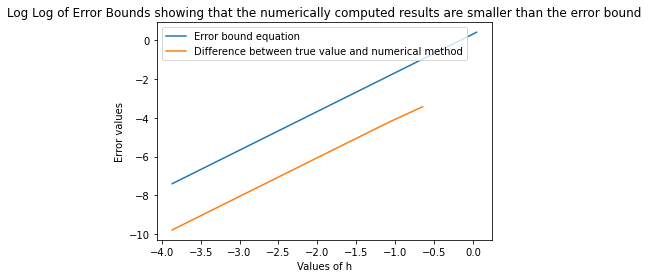

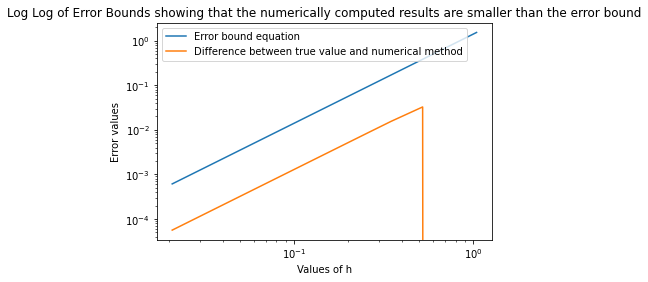

In [2]:
#plot here

plt.figure()
plt.title("Log Log of Error Bounds showing that the numerically computed results are smaller than the error bound")
plt.plot(np.log(h_list), np.log(error_list), label = "Error bound equation")
plt.plot(np.log(h_list), np.log(diff_list), label = "Difference between true value and numerical method")
#plt.loglog(h_list,error_list, label = "Error bound equation")
#plt.loglog(h_list,diff_list, label = "Difference between true value and numerical method")
plt.xlabel("Values of h")
plt.ylabel("Error values")
plt.legend()
plt.show()

plt.figure()
plt.title("Log Log of Error Bounds showing that the numerically computed results are smaller than the error bound")
plt.loglog(h_list,error_list, label = "Error bound equation")
plt.loglog(h_list,diff_list, label = "Difference between true value and numerical method")
plt.xlabel("Values of h")
plt.ylabel("Error values")
plt.legend()

#### Problem 1b:

Here in 1b I take into consideration a different interval, i.e. between 0 and $\pi 2$. In this interval the real, true integral of the given function f(x) is $\frac{8}{3}\pi$.

$$I_B = \int_0^{2\pi}f(x)dx = \frac{8\pi}{3}.\label{eq:res_calc}$$


In [3]:
b = 2*np.pi
n = np.linspace(1,50,50) # number of steps
area = 0
exact = 8*np.pi/3

# area of the trapezoid need to sum this for 50 steps
# store the values
area_list, diff_list = [], []
h_list = []
error_list = []

for i in n:
    h = b/i
    h_list.append(h)
    area = 0
    for t in range(0,int(i)):
        y1 = f(t*h)
        y2 = f((t+1)*h)
        A = h * 0.5*(y1+y2)
        area += A
        error = (h**2 * np.pi)/36 * finf
        diff = abs(exact - area)
    diff_list.append(diff)
    error_list.append(error)
    area_list.append(area)


print(f"List of areas from numerical method: {area_list} \n")
print(f"Actual value of 8*pi/3: {exact}")  

List of areas from numerical method: [25.132741228718345, 13.962634015954636, 10.77117481230786, 9.494591130849152, 8.918069468254895, 8.643535343210011, 8.509510809723535, 8.443286922589039, 8.41036937399381, 8.393958865896483, 8.38576563713465, 8.38167202393643, 8.379625966991794, 8.378603125853019, 8.37809175210701, 8.377836076938602, 8.377708242280391, 8.377644325682763, 8.377612367566817, 8.377596388554561, 8.377588399059864, 8.377584404315371, 8.377582406943837, 8.377581408258248, 8.377580908915503, 8.377580659244135, 8.377580534408457, 8.37758047199062, 8.377580440781701, 8.37758042517724, 8.377580417375011, 8.377580413473895, 8.377580411523338, 8.37758041054806, 8.37758041006042, 8.377580409816602, 8.37758040969469, 8.377580409633735, 8.37758040960326, 8.377580409588019, 8.3775804095804, 8.377580409576591, 8.377580409574687, 8.377580409573735, 8.377580409573259, 8.377580409573019, 8.377580409572897, 8.37758040957284, 8.37758040957281, 8.377580409572797] 

Actual value of 8*pi/3

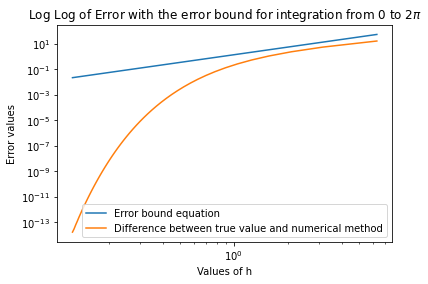

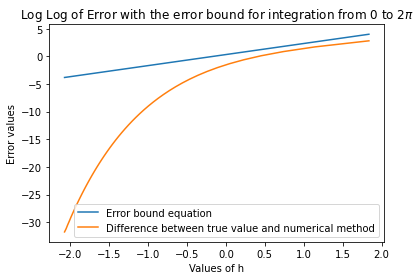

In [4]:
plt.figure()
plt.title("Log Log of Error with the error bound for integration from 0 to $2\pi$")
plt.loglog(h_list,error_list, label = "Error bound equation")
plt.loglog(h_list,diff_list, label = "Difference between true value and numerical method")
plt.xlabel("Values of h")
plt.ylabel("Error values")
plt.legend()

plt.figure()
plt.title("Log Log of Error with the error bound for integration from 0 to $2\pi$")
plt.plot(np.log(h_list),np.log(error_list), label = "Error bound equation")
plt.plot(np.log(h_list),np.log(diff_list), label = "Difference between true value and numerical method")
plt.xlabel("Values of h")
plt.ylabel("Error values")
plt.legend()

#### Does the absolute error scale like $h^m$ for some m?

I can see from the log-log plot in problem 1a that the error was decaying linearly. Here in problem 1b the error is not decaying linearly from the log-log plot at hand, but rather decaying exponentially with h. It means that here this error is converging exponentially. Therefore the error does not scale like $h^{m}$ for any value of m.

## Problem 2: Adaptive Integration


#### Problem 2a: 

Refer to the solutions provided in the Latex writeup.

#### Problem 2b:
Got the intuition from Yue OH and got further help from Johavana OH.


In this exercise I perform adaptive integration, meaning that I recursively split a given interval into 2 parts and use the 3-point Gauss quadrature to estimate the integral in each of these 2 intervals. The more splits, the more accurate the estimation of the interval (where the total estimation is the sum of the estimation of each single smaller splitted intervals).

I am performing the integration with the 3-point Gauss quadrature with also adaptive integration for 5 functions $x^{m}-x^{2}+1$   (with m = 4, 5, 6, 7, 8) between the interval of $-1$ and $\frac{5}{4}$ to estimate its integral, i.e. :


$$\int_{-1}^{9/4} (x^m-x^2+1) dx$$


The condition to stop the recursion is for the error ( the error is calculated as the inital 3-point gauss quadrature integration between a and b, i.e. Iab, minus the integration coming from the adaptive integration, i.e. the sum of all the sub-intervals integrated with the 3-point gauss quadrature integration, i.e. I_splits. Hence here the error is defined as error = Iab - I_splits) to be smaller than a tolerance of $T= 10^{-6}$ times the length of the given interval (as it gets updated).


My adaptive_integration function hence returns: the I_splits (the integration from the adaptive integration), how many intervals were necessary, and the error (calculated as Iab - I_splits). 

In [5]:
import numpy as np

# points found from 2a
x_leg = [-np.sqrt(3/5),0, np.sqrt(3/5)] 

#weights from 2a
w = [5/9, 8/9, 5/9]

# different values of m 
def f4(x):
    return x**4 - x**2 + 1
f5 = lambda x: x**5 - x**2 + 1
f6 = lambda x: x**6 - x**2 + 1
f7 = lambda x: x**7 - x**2 + 1
f8 = lambda x: x**8 - x**2 + 1

a = -1     
b = 9/4

x_leg = [-np.sqrt(3/5),0, np.sqrt(3/5)] # t0, t1, t2
w = [5/9, 8/9, 5/9]

def integral_est(func, a, b):  
    x_0 = ((b-a)*x_leg[0] + (b+a))/2   # Here I am updating the points x for each different interval ab
    x_2 = ((b-a)*x_leg[2] + (b+a))/2
    x_1 = (x_0 + x_2 )/2 #c = (a+b)/2
    part0 = w[0]*(func(x_0))
    part1 = w[1]*(func(x_1))
    part2 = w[2]*(func(x_2))
    return ((b-a)/2 )*(part0 + part1 + part2)   


def adaptive_integration(func, a, b):
    n = 0 
    c = (a + b)/2
    length = abs(b - a)
    Iab = integral_est(func,a,b)

    # now do a split 
    Iac = integral_est(func, a, c)
    Icb = integral_est(func, c, b)
    I_splits = Iac + Icb
    error = abs(Iab - I_splits)
    T=1e-6
    if error < T*length:
        n +=1
        return Iab, n, error
    else:
        n += 1
        I_ac, na , error_ac = adaptive_integration(func, a, c) 
        I_cb, nb, error_cb =  adaptive_integration(func, c, b)
        error = error_ac + error_cb
        I_splits = I_ac+ I_cb
        n_splits = na + nb
   
    
    return I_splits, n_splits, error
    

In [6]:
Iab = integral_est(f4,a,b)

Iab

10.852799479166665

In [7]:
adaptive_integration(f4, a, b)

(10.852799479166665, 1, 1.7763568394002505e-15)

In [8]:
adaptive_integration(f5, a, b)

(20.577514648437496, 1, 7.105427357601002e-15)

In [9]:
adaptive_integration(f6, a, b)

(40.96682876426836, 16, 8.025390488275441e-08)

In [10]:
adaptive_integration(f7, a, b)

(81.0998956861716, 15, 5.870134192065279e-07)

In [11]:
adaptive_integration(f8, a, b)

(163.44111091842885, 20, 7.379724338008042e-07)

#### Problem 2c:

Here I will use the adaptive_integration function from 2b to estimate the integral other 3 given functions for three different intervals, as shown below: $$	
	\int_{-1}^1 |x| dx, \qquad \int_{-1}^2 |x| dx, \qquad \int_0^1 x^{4/5} \sin \frac{1}{x} \, dx.
	$$


In [12]:
def function_abs(x): #this is for the absolute value
    return abs(x)

def function_c(x):
    return (x**(4/5))*(np.sin(1/x))

In [13]:
adaptive_integration(function_abs, -1, 1)

(1.0, 2, 0.0)

In [14]:
adaptive_integration(function_abs, -1, 2)

(2.500000000096074, 16, 7.20552679410032e-11)

In [15]:
adaptive_integration(function_c, 0, 1)

(0.40114965238061046, 91246, 2.2732999252997582e-07)

### Problem 3: Integration of a family of functions

#### Problem 3a:

For a given parameter $\phi\in(0,1)$, I am  coding here a function $g(x;\phi)$ - in my code this is f_fam(). This is a recursive function in the interval 
$x\in[-\frac{1}{2},\frac{1}{2}]$, where $f_0(x;\phi)=|x|$ and $f_k(x;\phi)=|f_{k-1}(x;\phi)-\phi^k|$. 


The
    $g$ limiting function is given by
    \begin{equation}
      g(x;\phi)=\lim_{k\to \infty} f_k(x;\phi).
    \end{equation}
    For a given $\phi$, the function $g$ can be numerically approximated
    by $f_n$, where $n$ is taken to be the smallest value such that
    $\phi^n<10^{-16}$. In my code I find this $n$ value in the function small_phi(), which will return an n value that I will consider an approximtion to my k value.
    
    

In this exercise I plot $g(x;\frac{1}{3})$ on the interval $[-\frac{1}{2},\frac{1}{2}]$.

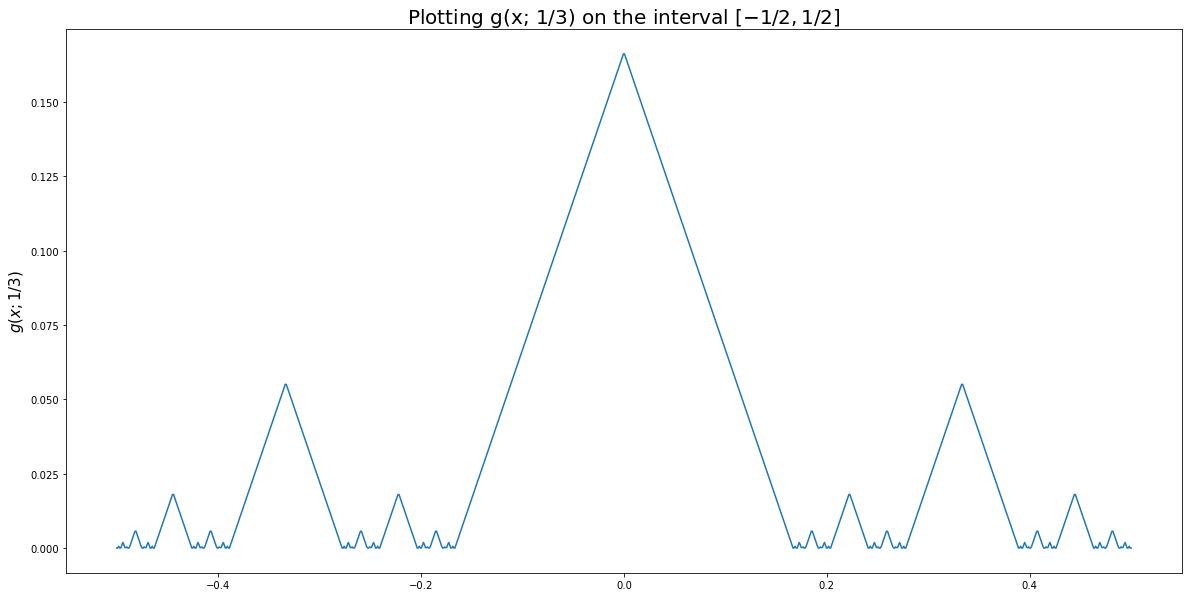

In [16]:
import numpy as np
import matplotlib.pyplot as plt
interval = np.linspace(-0.5,0.5,1000)
phi = 1/3

def f_fam(x,phi,k):
    if k == 0:
        return abs(x)  # for f0
    else:
        return abs(f_fam(x,phi,k-1)- phi**k) # for f1 and above just index 1 back 
# recursion going back & continuing to do smaller pieces

# find the smallest value of phi 
def small_phi(phi):
    n = 0
    while phi**n >= 10**-16:
        n +=1
    return n

kvalue = (small_phi(phi))

plt.figure(figsize = (20, 10))
plt.plot(interval, f_fam(interval, phi, kvalue))
plt.title("Plotting g(x; 1/3) on the interval $[-1/2, 1/2]$", size = 20)
plt.ylabel("$g(x; 1/3)$", size = 15)
plt.show()

#### Problem 3b 
#### Re-using the adaptive_integration function from 2b

##### --> Warning <-- 

This will take about 90 seconds (1 min and half) to run! I was hitting a recursion limit so I manually changed it, as Chris suggested in his office hours. In the code I did that with sys.setrecursionlimit()


In this exercise I am using the function adaptive_integration() from above with some minor modifications to account for the arguments of the function g (such as $\phi$ and $k$). 

Here I will integrate, with the function adaptive_integration(), this:
$$
	  I(\phi) = \int_{-1/2}^{1/2} g(x;\phi) dx $$
     
for $\phi\in(0,1)$. Additionally, in doing this this, I  calculate $I(\phi)$ at 99 points $\phi=0.01, 0.02, \ldots, 0.99$. 

Later I will plot the number of integration intervals used as a function of $\phi$.
From there you can see that approximately the range of $\phi$ values that requires most intervals is between 0.4 and 0.5.

In [17]:
import sys 

sys.setrecursionlimit(5000)
x_leg = [-np.sqrt(3/5),0, np.sqrt(3/5)] # t0, t1, t2
w = [5/9, 8/9, 5/9]
split_list = {}


def function_g(x, phi, k):
    if k == 0:
        return abs(x)  # for f0
    else:
        return abs(function_g(x,phi,k-1)- phi**k) 

def integral_est(a, b, phi):  
    x_0 = ((b-a)*x_leg[0] + (b+a))/2   # does a mapping between x and t  & change of variable
    x_2 = ((b-a)*x_leg[2] + (b+a))/2
    x_1 = (x_0 + x_2 )/2
    #c = (a+b)/2
    w0 = w[0]*function_g((x_0), phi, small_phi(phi))
    w1 = w[1]*function_g((x_1), phi, small_phi(phi))
    w2 = w[2]*function_g((x_2), phi, small_phi(phi))
    return ((b-a)/2 )*(w0 + w1 + w2)   


def adaptive_integration(a, b, phi):
    n = 0 
    ##a, c, b = transformation(t,a,b)
    c = (a + b)/2
    length = abs(b - a)
    ###length = abs(a-b)*(1/(2**n)) # changes length as the splits occur

    Iab = integral_est(a,b, phi)

    # now do a split 
    Iac = integral_est(a, c, phi)
    Icb = integral_est(c, b, phi)
    I_splits = Iac + Icb
    error = abs(Iab - I_splits)
    T=1e-6
    if error < T*length:
        n +=1
        return Iab, n, error
    else:
        n += 1
        I_ac, na , error_ac = adaptive_integration(a, c, phi) 
        I_cb, nb, error_cb =  adaptive_integration(c, b, phi)
        error = error_ac + error_cb
        I_splits = I_ac+ I_cb
        n_splits = na + nb
    
    return I_splits, n_splits, error

#phi = range(0.01,0.99,0.01)
values_phi_list = np.linspace(0.01,0.99,99)

integrations_phi = {}

for i in values_phi_list:
    ##valuek = small_phi(i)
    #print(i)
    #gx = function_g(x, i, small_phi(i))
    Iab, n, error = adaptive_integration(-0.5, 0.5, i) # need to check if we change a,b 
    #print(small_phi(i))
    split_list[i] = n
    integrations_phi[i] = Iab



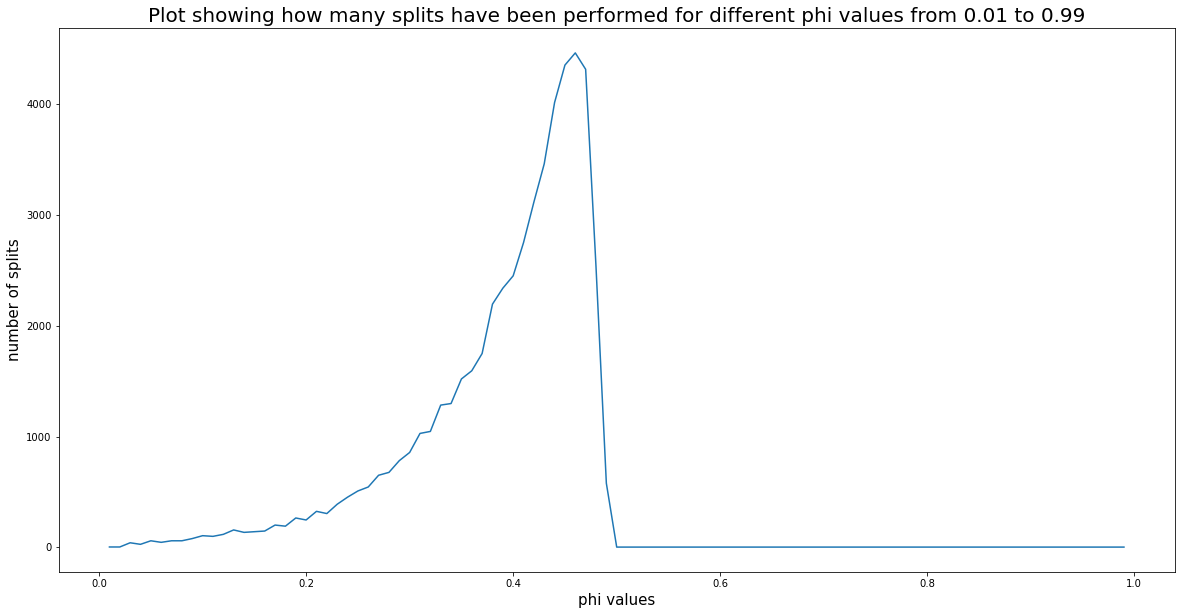

In [18]:
lists = sorted(split_list.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize = (20, 10))
plt.plot(x, y)
plt.xlabel("phi values", size = 15)
plt.ylabel("number of splits", size = 15)
plt.title("Plot showing how many splits have been performed for different phi values from 0.01 to 0.99", size = 20)
plt.show()

From the graph above I can see that approximately the range of $\phi$ values that requires most intervals is between 0.4 and 0.5.

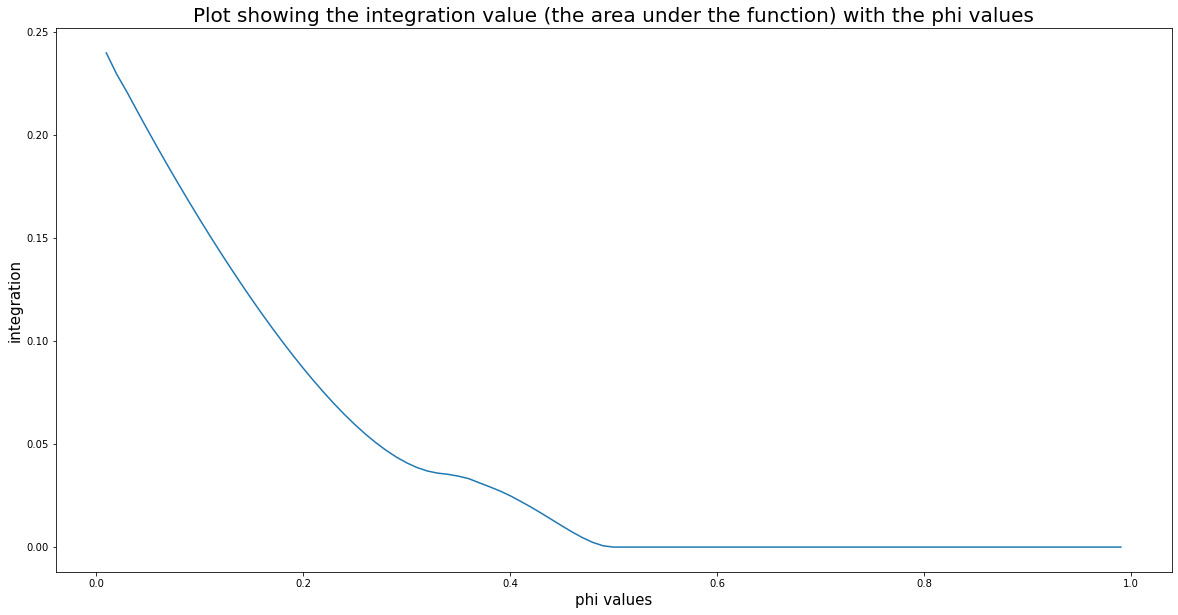

In [19]:
lists = sorted(integrations_phi.items()) # sorted by key, return a list of tuples

x1, y1 = zip(*lists) # unpack a list of pairs into two tuples


plt.figure(figsize = (20, 10))
plt.plot(x1, y1)
plt.xlabel("phi values", size = 15)
plt.ylabel("integration", size = 15)
plt.title("Plot showing the integration value (the area under the function) with the phi values", size = 20)
plt.show()

## Problem 4: Error analysis of a numerical integration rule

Please refer to the solutions in my Latex writeup.

## Problem 6: Asteroid Collision

#### Problem 6a: 

Throughout the asteroid's movement, the Jacobi integral, $J$, is a constant of motion, and is given by
$$
      J(x,y,u,v) = (x-\mu)^2 + y^2 + \frac{2(1-\mu)}{\sqrt{x^2+y^2}} +
      \frac{2\mu}{\sqrt{(x-1)^2+y^2}} - u^2 - v^2
  $$
    
 where $\mu=0.01$ is the ratio of the Moon's mass to the total mass of the Earth and Moon. The asteroid's equations of motion are given by the system of ODEs,
    





$$x'= -\dfrac{1}{2}\dfrac{\partial J}{\partial u'}= u$$

$$y'= -\dfrac{1}{2}\dfrac{\partial J}{\partial v'} = v$$

$$u'= v + \dfrac{1}{2}\dfrac{\partial J}{\partial x'} =  v -\mu + x +
\dfrac{\mu(1-x)}{y^2 + (x-1)^2)^{\frac{3}{2}}} - \dfrac{x(1-\mu)}{(x^2+y^2)^{\frac{3}{2}}} $$

$$v'= -u + \dfrac{1}{2}\dfrac{\partial J}{\partial y} = -u + y - \dfrac{\mu y}{(y^2 + (x-1)^2)^{\frac{3}{2}}} - \dfrac{y(1-\mu)}{(x^2+y^2)^{\frac{3}{2}}}  $$

In [29]:
def variables(var,t):
    x,y,u,v = var
    mu = 0.01
    comp_x = u
    comp_y = v
    comp_u = v - mu + x + (mu*(1-x))*(y**2 + (x-1)**2)**(-3/2) - x*(1-mu)*(x**2 + y**2)**(-3/2)
    comp_v = -u +y - mu*y*(y**2 + (x-1)**2)**(-3/2) - y*(1-mu)*(x**2 +y**2)**(-3/2)
    return [comp_x,comp_y,comp_u,comp_v]

#### Problem 6b: 

Here I check if the computed asteroid trajectory intersects with the Earth or the Moon. 

In [30]:
# positions
from numpy.linalg import norm
earth = [0,0]
moon = [1,0]

#radii
Er = 0.02
Mr = 0.005

u = 0.01 # ratio of moon's mass to totall mass of earth & moon 

def intersect_line(x0,y0,x1,y1,R):
    
    # creating basic vectors
    v_bar = np.array([x1 - x0,y1-y0])
    x0_bar = np.array([x0,y0])
    x1_bar = np.array([x1,y1])
    
    # creating the closest point to the origin x_prime
    #lam = 0
    #x_bar = x0_bar + lam*v_bar general description
    lam_prime = np.dot(-1* x0_bar, v_bar) / np.dot(v_bar, v_bar)
    #print(lam_prime)
    x_prime = x0_bar + lam_prime*v_bar

    # now need to check conditions
    #using the norm so we can use R vs R^2
    x0_norm = norm(x0_bar)
    x1_norm = norm(x1_bar)
    xp_norm = norm(x_prime)
    #print(xp_norm)
    #print(x_prime)
    
    if x0_norm < R:
        return True #True = does intersect

    elif x1_norm < R: 
        return True
    
    elif lam_prime <= 1 and lam_prime >= 0 and xp_norm < R:
        return True 

    else: 
        return False # False = doesn't intersect 

In [31]:
print(intersect_line(-1,0,0,1,0.8))

True


#### Problem 6c: 

Using odeint I integrate the system from part (a) over the range $0 \le t \le 10$, for ten initial conditions for $x(0)$ and $v(0)$, sampled according to the procedure described above. 

With this, I plot  a figure showing the Earth and Moon as circles with the given radii, and the ten computed trajectories overlaid.


In [32]:
x_obs_zero = np.array([1.0798,0])
x_obs_2 = np.array([1.0802,-0.0189])

t = [0,0.02]

# errors for obs zero
Ex_0 = np.random.normal(0, 0.002,10)
Ey_0 = np.random.normal(0, 0.002,10)

# errors for obs at 0.002
Ex_2 = np.random.normal(0, 0.002,10)
Ey_2 = np.random.normal(0, 0.002,10)


extra = []
x_t0_list = []
v0_list = []

for i in range(0,10):
    #np.array([Ex_0[i], Ey_0[i]])
    
    x_t0 = x_obs_zero + np.array([Ex_0[i], Ey_0[i]])
    #print("x_t0",x_t0)
    x_t0_list.append(x_t0)
    
    x_t2 = x_obs_2 + np.array([Ex_2[i], Ey_2[i]])
    #print("x_t2",x_t2)

    #velocity = displacement / time
    v0 = (x_t2 - x_t0)/0.02
    #print("diff:",x_t2 - x_t0)
    v0_list.append(v0)

#print(v0_list)

print(x_t0_list)

[array([ 1.07959492, -0.00277743]), array([1.08021205e+00, 5.66559011e-04]), array([1.07982574e+00, 1.07412112e-03]), array([1.07638504, 0.00166868]), array([ 1.08051282, -0.001364  ]), array([ 1.08198966, -0.00204932]), array([1.08119168, 0.0040077 ]), array([ 1.08125041, -0.00140148]), array([ 1.08124963, -0.00111561]), array([1.07953301e+00, 6.63239327e-04])]


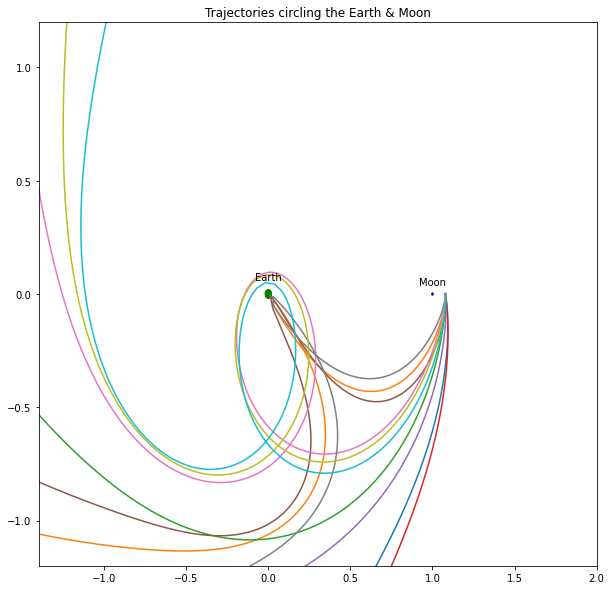

In [33]:
# use odeint routine
from scipy.integrate import odeint

t_list = np.linspace(0,10,1000)

fig, ax = plt.subplots(figsize = (10,10))
earth = plt.Circle((0, 0), 0.02, color='g')
moon = plt.Circle((1, 0), 0.005, color='b')
for i in range(0, 10):
    # just need to unpack our saved x_t0 list
    tuple1 = x_t0_list[i]
    x_t0 = tuple1[0]
    y_t0 = tuple1[1]

    # just need to unpack our saved v0 list
    tuple2 = v0_list[i]
    u0 = tuple2[0]
    v0 = tuple2[1]
    solution = odeint(variables, [x_t0,y_t0,u0,v0], t_list)
    #ax.annotate()
    ax.plot(solution[:,0],solution[:,1])
    ax.set_xlim(-1.4,2)
    ax.set_ylim(-1.2,1.2)
ax.add_patch(earth)
label = ax.annotate("Earth", xy=(0, +0.06), fontsize=10,ha = "center")
ax.add_patch(moon)
label = ax.annotate("Moon", xy=(1,0.04), fontsize=10, ha = "center")

plt.title("Trajectories circling the Earth & Moon")
plt.show()


# Here I am creating intially just 10 random trajectories, and given 
# that it s more likely that they hit the earth and not the noot, these will likley all hit earth. 

#### Problem 6d


Now I simulate 2,500 or more trajectories over the range $0 \le t \le 10$ using initial conditions from part (c). For each trajectory, I will determine whether: 

-- it first collides with the Moon,

-- it first collides with the Earth,

-- it collides with neither.

To determine collisions for a given trajectory, I take the numerically computed asteroid positions $x_0, x_1, ...$, and use the program intersect_line() from part (b) to find whether each line segment from $x_k$ to $x_{k+1}$ intersects with either the Moon or Earth.

Based on the trajectories, I have calculated the probability that asteroid will collide with the Moon, and the probability that the asteroid will collide with the Earth. At every run of the code, the numbers will be slightly different because of the randomness of the errors above, however I roughly get that the probability that the asteroid will collide firstly with the earth is 21%, with the moon 0.2%, and with none 78.8%. 

Later I plot 10 trajectories that collide with the Earth (out of the about 500 I usually get), and the two (usually I get 2 after running it multiple times) that collide with the Moon.

In [34]:
steps = 1000

moon_tjx = []
moon_tjy = []

earth_tjx = []
earth_tjy = []

earth_hits = 0
moon_hits = 0
tj = 2500

#Positions of the earth/moon
earth = [0,0]
moon = [1,0]

#radii
Er = 0.02
Mr = 0.005


# Adding new errors because we want to run more trajectories
Ex_0 = np.random.normal(0, 0.002,tj)
Ey_0 = np.random.normal(0, 0.002,tj)

# Adding new errors because we want to run more trajectories
Ex_2 = np.random.normal(0, 0.002,tj)
Ey_2 = np.random.normal(0, 0.002,tj)

for i in range(0,tj): # total number of trajectories
    x_t0 = x_obs_zero + np.array([Ex_0[i], Ey_0[i]])
    #x_t0_list.append(x_t0)
     
    x_t2 = x_obs_2 + np.array([Ex_2[i], Ey_2[i]])

    #velocity = displacement / time
    v0 = (x_t2 - x_t0)/0.02
    #v0_list.append(v0)
    
    solution = odeint(variables, [x_t0[0],x_t0[1],v0[0],v0[1]], t_list)


    for j in range(0, steps-1):  #because n-1 line segments, steps of the ODE
      
        x_sol = solution[j][0]
        y_sol = solution[j][1]
        
        x_sol2 = solution[j+1][0]
        y_sol2 = solution[j+1][1]
        

        #intersect_line(x0,y0,x1,y1,R)
        # if found it intersects then correlate to 
        # need an if statement because we don't want to count each one
        if intersect_line(x_sol2,y_sol2,x_sol,y_sol,Er):
            earth_hits += 1
            #hit_earth.append([x_sol2,y_sol2,x_sol,y_sol]) # appending points where it hits
            earth_tjx.append(solution[:,0])
            earth_tjy.append(solution[:,1])                
            break
            
        # need to account that x coordinates have shifted by 1 because we created a line that hits the origin
        if intersect_line(x_sol2-1,y_sol2,x_sol-1,y_sol,Mr):
            moon_hits += 1
            #hit_moon.append([x_sol2,y_sol2,x_sol,y_sol])
            moon_tjx.append(solution[:,0])
            moon_tjy.append(solution[:,1]) 
            break

/Users/anavitoriarodrigueslima/miniconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [35]:
print(f"Amount of Earth Hits: {earth_hits}")
print(f"Amount of Moon Hits: {moon_hits}")

probability_earth = earth_hits/tj
print(f"Probabilitiy it collides with the Earth: {probability_earth}")

# got the same 
probability_moon = moon_hits/tj
print(f"Probabilitiy it collides with the Moon: {probability_moon}")

neither = tj - earth_hits - moon_hits
neither_prob = neither/tj
print(f"Probability it hits neither: {neither_prob}")

Amount of Earth Hits: 542
Amount of Moon Hits: 5
Probabilitiy it collides with the Earth: 0.2168
Probabilitiy it collides with the Moon: 0.002
Probability it hits neither: 0.7812


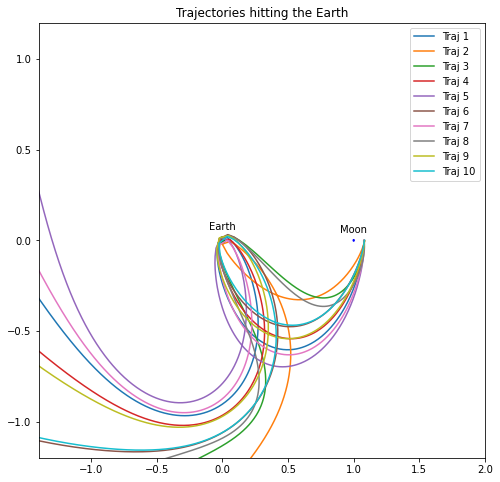

In [36]:
earth_arrayx = np.array(earth_tjx)
earth_arrayy = np.array(earth_tjy)
fig, ax = plt.subplots(1,1,figsize = (8,8))
earth = plt.Circle((0, 0), 0.02, color='g')
moon = plt.Circle((1, 0), 0.005, color='b')
plt.plot(earth_tjx[0],earth_tjy[0], label = "Traj 1")
plt.plot(earth_tjx[1],earth_tjy[1], label = "Traj 2")
plt.plot(earth_tjx[2],earth_tjy[2], label = "Traj 3")
plt.plot(earth_tjx[3],earth_tjy[3], label = "Traj 4")
plt.plot(earth_tjx[4],earth_tjy[4], label = "Traj 5")
plt.plot(earth_tjx[5],earth_tjy[5], label = "Traj 6")
plt.plot(earth_tjx[6],earth_tjy[6], label = "Traj 7")
plt.plot(earth_tjx[7],earth_tjy[7], label = "Traj 8")
plt.plot(earth_tjx[8],earth_tjy[8], label = "Traj 9")
plt.plot(earth_tjx[9],earth_tjy[9], label = "Traj 10")


# Here i could plot all the 519 (or 500 something) trajectories but i plot only 10 for simplicity of the graph
earth = plt.Circle((0, 0), 0.02, color='g')
moon = plt.Circle((1, 0), 0.005, color='b')
plt.xlim(-1.4,2)
plt.ylim(-1.2,1.2)
ax.add_patch(earth)
label = ax.annotate("Earth", xy=(0, +0.06), fontsize=10,ha = "center")
ax.add_patch(moon)
label = ax.annotate("Moon", xy=(1,0.04), fontsize=10, ha = "center")

plt.title("Trajectories hitting the Earth")
plt.legend()
plt.show()

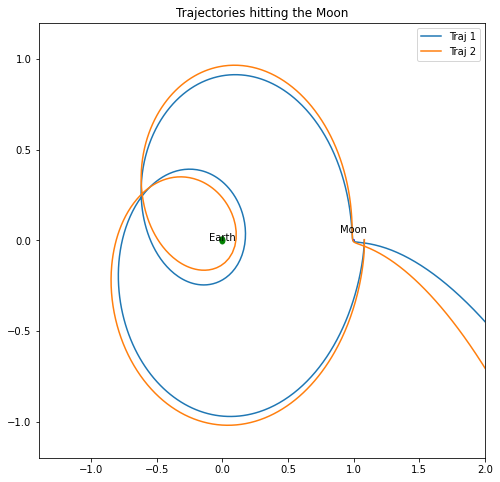

In [37]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
#earth = plt.Circle((0, 0), 0.02, color='g')
moon = plt.Circle((0, 0), 0.005, color='b')  # need to center moon at 0,0 now since I offset the points
plt.plot(moon_tjx[0],moon_tjy[0],label = "Traj 1")
plt.plot(moon_tjx[1],moon_tjy[1],label = "Traj 2")
#plt.plot(moon_tjx[2]-1,moon_tjy[2],label = "Traj 3") # can uncomment based on how many hits
#plt.plot(moon_tjx[3]-1,moon_tjy[3],label = "Traj 4")
plt.xlim(-1.4,2)
plt.ylim(-1.2,1.2)

earth = plt.Circle((0, 0), 0.02, color='g')
moon = plt.Circle((1, 0), 0.005, color='b')
ax.add_patch(earth)
label = ax.annotate("Earth", xy=(0, 0), fontsize=10,ha = "center")
ax.add_patch(moon)
label = ax.annotate("Moon", xy=(1,0.04), fontsize=10, ha = "center")

plt.title("Trajectories hitting the Moon")
plt.legend()
plt.show()#